Problem Set 2, Problem 2: Geometric Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Part a)

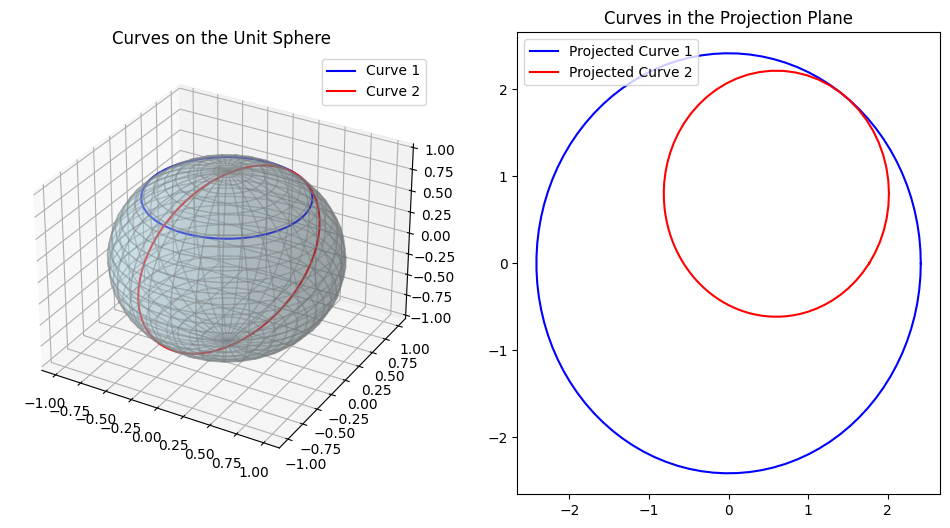

Average angle on the sphere: 27.65 degrees
Average angle in the projection plane: 27.60 degrees


In [2]:
# Stereographic projection function
def stereographic_projection(x, y, z):
    denom = 1 - z
    
    # Initialize the projected coordinates as NaN
    x_proj = np.full_like(x, np.nan, dtype=float)
    y_proj = np.full_like(y, np.nan, dtype=float)
    
    # Only perform the projection where the denominator is non-zero
    mask = denom != 0  # Create a mask for non-zero denominators
    x_proj[mask] = x[mask] / denom[mask]  # Apply projection where denom is non-zero
    y_proj[mask] = y[mask] / denom[mask]  # Apply projection where denom is non-zero
    
    return x_proj, y_proj

# Function to generate the unit sphere mesh
def generate_sphere_mesh(theta_steps=30, phi_steps=30):
    theta = np.linspace(0, np.pi, theta_steps)  # Latitude (from -pi/2 to pi/2)
    phi = np.linspace(0, 2*np.pi, phi_steps)    # Longitude (from 0 to 2*pi)
    theta, phi = np.meshgrid(theta, phi)
    
    # Parametric equations for the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return x, y, z, theta, phi

x, y, z, theta, phi = generate_sphere_mesh()

# Define a line of latitude (e.g., theta = pi/4)
t = np.linspace(0, 2 * np.pi, 100)
curve1_x = np.sin(np.pi / 4) * np.cos(t)  # Latitude curve at θ = π/4
curve1_y = np.sin(np.pi / 4) * np.sin(t)
curve1_z = np.cos(np.pi / 4) * np.ones_like(t)

# Define a second curve
curve2_x = np.cos(t)
curve2_y = np.sin(t)
curve2_z = (3* curve2_x + 4 * curve2_y) / 5

magnitude = np.sqrt(curve2_x**2 + curve2_y**2 + curve2_z**2)
curve2_x /= magnitude
curve2_y /= magnitude
curve2_z /= magnitude

# Project curves using stereographic projection
curve1_proj_x, curve1_proj_y = stereographic_projection(curve1_x, curve1_y, curve1_z)
curve2_proj_x, curve2_proj_y = stereographic_projection(curve2_x, curve2_y, curve2_z)

# Compute tangent vectors on the sphere
curve1_tangent = np.gradient(np.column_stack([curve1_x, curve1_y, curve1_z]), axis=0)
curve2_tangent = np.gradient(np.column_stack([curve2_x, curve2_y, curve2_z]), axis=0)

# Compute tangent vectors in the projection plane
curve1_proj_tangent = np.gradient(np.column_stack([curve1_proj_x, curve1_proj_y]), axis=0)
curve2_proj_tangent = np.gradient(np.column_stack([curve2_proj_x, curve2_proj_y]), axis=0)

# Compute angles between tangents on the sphere
dot_product_sphere = np.einsum('ij,ij->i', curve1_tangent, curve2_tangent)
norm_curve1 = np.linalg.norm(curve1_tangent, axis=1)
norm_curve2 = np.linalg.norm(curve2_tangent, axis=1)
angles_sphere = np.arccos(dot_product_sphere / (norm_curve1 * norm_curve2))

# Compute angles between tangents in the projection plane
dot_product_proj = np.einsum('ij,ij->i', curve1_proj_tangent, curve2_proj_tangent)
norm_curve1_proj = np.linalg.norm(curve1_proj_tangent, axis=1)
norm_curve2_proj = np.linalg.norm(curve2_proj_tangent, axis=1)
angles_proj = np.arccos(dot_product_proj / (norm_curve1_proj * norm_curve2_proj))

# Plot the curves on the sphere
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_surface(x, y, z, color='lightblue', alpha=0.3, edgecolor='grey')
ax3d.plot(curve1_x, curve1_y, curve1_z, label='Curve 1', color='b')
ax3d.plot(curve2_x, curve2_y, curve2_z, label='Curve 2', color='red')
ax3d.set_title('Curves on the Unit Sphere')
ax3d.legend()

# Plot the curves in the projection plane
ax2 = fig.add_subplot(122)
ax2.plot(curve1_proj_x, curve1_proj_y, label='Projected Curve 1', color='b')
ax2.plot(curve2_proj_x, curve2_proj_y, label='Projected Curve 2', color='r')
ax2.set_title('Curves in the Projection Plane')
ax2.legend()
plt.savefig('curves_projection.png')
plt.show()

# Print comparison of angles
print("Average angle on the sphere: {:.2f} degrees".format(np.degrees(np.mean(angles_sphere))))
print("Average angle in the projection plane: {:.2f} degrees".format(np.degrees(np.mean(angles_proj))))

Part b)

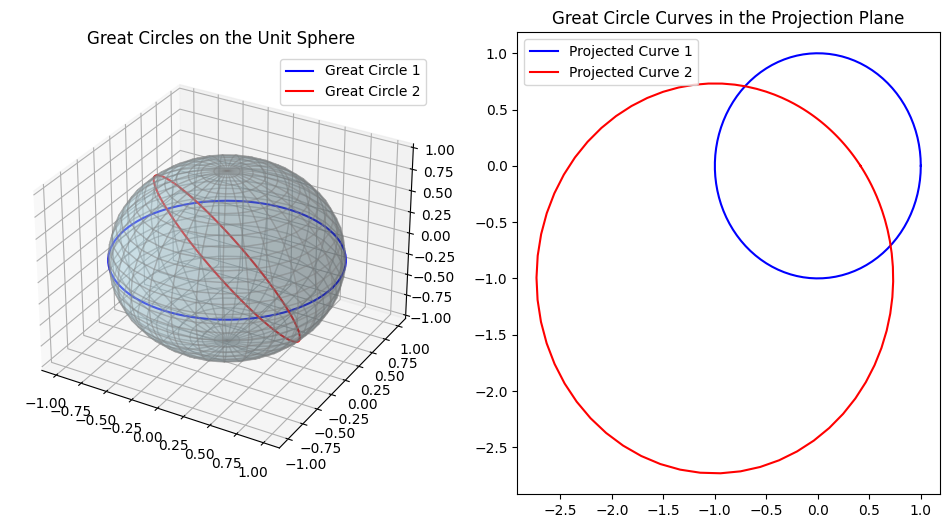

Average angle on the sphere: 32.86 degrees
Average angle in the projection plane: 32.80 degrees


In [3]:
# Define a line of latitude (e.g., theta = pi/4)
t = np.linspace(0, 2 * np.pi, 100)
curve1_x = np.sin(np.pi/2) * np.cos(t)  # Latitude curve at θ = π/4
curve1_y = np.sin(np.pi/2) * np.sin(t)
curve1_z = np.cos(np.pi/2) * np.ones_like(t)

# Define a second curve
curve2_x = np.cos(t)
curve2_y = np.sin(t)
curve2_z = -(1* curve2_x + 1 * curve2_y) / 1

magnitude = np.sqrt(curve2_x**2 + curve2_y**2 + curve2_z**2)
curve2_x /= magnitude
curve2_y /= magnitude
curve2_z /= magnitude

# Project curves using stereographic projection
curve1_proj_x, curve1_proj_y = stereographic_projection(curve1_x, curve1_y, curve1_z)
curve2_proj_x, curve2_proj_y = stereographic_projection(curve2_x, curve2_y, curve2_z)

# Compute tangent vectors on the sphere
curve1_tangent = np.gradient(np.column_stack([curve1_x, curve1_y, curve1_z]), axis=0)
curve2_tangent = np.gradient(np.column_stack([curve2_x, curve2_y, curve2_z]), axis=0)

# Compute tangent vectors in the projection plane
curve1_proj_tangent = np.gradient(np.column_stack([curve1_proj_x, curve1_proj_y]), axis=0)
curve2_proj_tangent = np.gradient(np.column_stack([curve2_proj_x, curve2_proj_y]), axis=0)

# Compute angles between tangents on the sphere
dot_product_sphere = np.einsum('ij,ij->i', curve1_tangent, curve2_tangent)
norm_curve1 = np.linalg.norm(curve1_tangent, axis=1)
norm_curve2 = np.linalg.norm(curve2_tangent, axis=1)
angles_sphere = np.arccos(dot_product_sphere / (norm_curve1 * norm_curve2))

# Compute angles between tangents in the projection plane
dot_product_proj = np.einsum('ij,ij->i', curve1_proj_tangent, curve2_proj_tangent)
norm_curve1_proj = np.linalg.norm(curve1_proj_tangent, axis=1)
norm_curve2_proj = np.linalg.norm(curve2_proj_tangent, axis=1)
angles_proj = np.arccos(dot_product_proj / (norm_curve1_proj * norm_curve2_proj))

# Plot the curves on the sphere
fig = plt.figure(figsize=(12, 6))
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_surface(x, y, z, color='lightblue', alpha=0.3, edgecolor='grey')
ax3d.plot(curve1_x, curve1_y, curve1_z, label='Great Circle 1', color='b')
ax3d.plot(curve2_x, curve2_y, curve2_z, label='Great Circle 2', color='red')
ax3d.set_title('Great Circles on the Unit Sphere')
ax3d.legend()

# Plot the curves in the projection plane
ax2 = fig.add_subplot(122)
ax2.plot(curve1_proj_x, curve1_proj_y, label='Projected Curve 1', color='b')
ax2.plot(curve2_proj_x, curve2_proj_y, label='Projected Curve 2', color='r')
ax2.set_title('Great Circle Curves in the Projection Plane')
ax2.legend()
plt.savefig('great_circles_projection.png')
plt.show()

# Print comparison of angles
print("Average angle on the sphere: {:.2f} degrees".format(np.degrees(np.mean(angles_sphere))))
print("Average angle in the projection plane: {:.2f} degrees".format(np.degrees(np.mean(angles_proj))))

Part c)

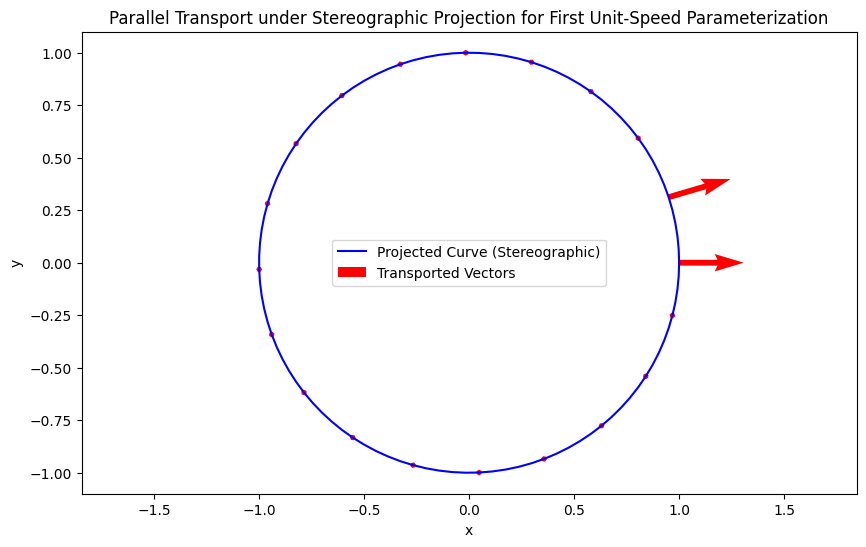

In [4]:
# Define the simpler curve (circle at latitude θ = π/2)
t = np.linspace(0, 2 * np.pi, 100)
curve1_x = np.sin(np.pi / 2) * np.cos(t)  # Latitude curve at θ = π/2
curve1_y = np.sin(np.pi / 2) * np.sin(t)
curve1_z = np.cos(np.pi / 2) * np.ones_like(t)
curve = np.column_stack([curve1_x, curve1_y, curve1_z])

# Parallel transport along the curve
def parallel_transport(initial_vector, curve_points):
    transported_vectors = [initial_vector]
    for i in range(1, len(curve_points)):
        v_prev = transported_vectors[-1]
        p_prev = curve_points[i - 1]
        p_next = curve_points[i]
        
        # Compute the tangent vector along the curve
        tangent = p_next - p_prev
        tangent /= np.linalg.norm(tangent)
        
        # Adjust the vector for parallel transport
        v_next = v_prev - np.dot(v_prev, p_next) * p_next  # Ensure orthogonality to p_next
        v_next -= np.dot(v_next, tangent) * tangent  # Ensure orthogonality to tangent
        transported_vectors.append(v_next / np.linalg.norm(v_next))  # Normalize
    return np.array(transported_vectors)

# Initial vector for transport
initial_vector = np.array([1, 0, 0])  # Example initial tangent vector

# Compute parallel transport vectors
transported_vectors = parallel_transport(initial_vector, curve)

# Project the curve and vectors to the plane
x_proj, y_proj = stereographic_projection(curve[:, 0], curve[:, 1], curve[:, 2])
vector_x_proj, vector_y_proj = stereographic_projection(
    transported_vectors[:, 0], transported_vectors[:, 1], transported_vectors[:, 2]
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_proj, y_proj, label='Projected Curve (Stereographic)', color='blue')
plt.quiver(
    x_proj[::5], y_proj[::5], vector_x_proj[::5], vector_y_proj[::5],
    color='red', scale=12, label='Transported Vectors'
)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parallel Transport under Stereographic Projection for First Unit-Speed Parameterization')
plt.legend()
plt.axis('equal')
plt.savefig('parallel_transport_projection.png')
plt.show()

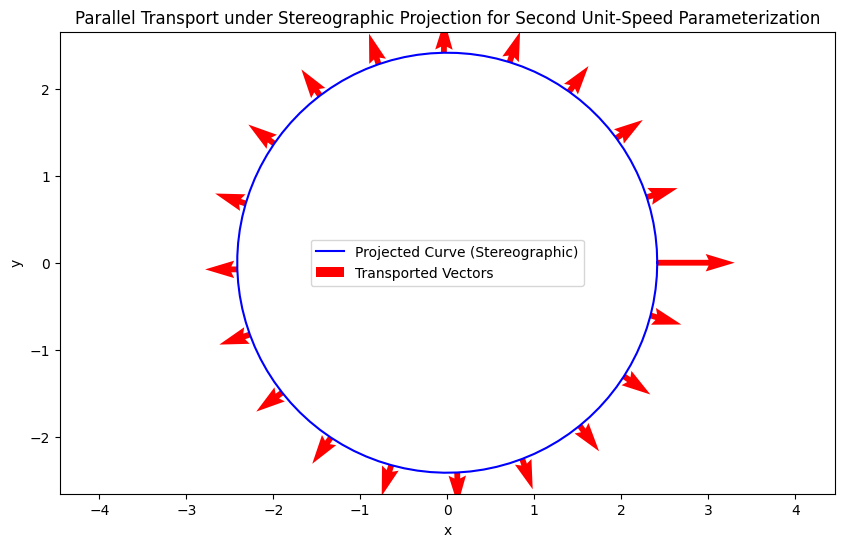

In [5]:
# Define the unit-speed parameterization γ(t) = φ̂eφ
t = np.linspace(0, 2 * np.pi, 100)  # Parameter range
curve2_x = np.sin(np.pi / 4) * np.cos(t)  # Fixed latitude θ = π/4
curve2_y = np.sin(np.pi / 4) * np.sin(t)
curve2_z = np.cos(np.pi / 4) * np.ones_like(t)
curve = np.column_stack([curve2_x, curve2_y, curve2_z])

# Initial vector for transport
initial_vector = np.array([1, 0, 0])  # Example initial tangent vector

# Compute parallel transport vectors
transported_vectors = parallel_transport(initial_vector, curve)

# Project the curve and vectors to the plane
x_proj, y_proj = stereographic_projection(curve[:, 0], curve[:, 1], curve[:, 2])
vector_x_proj, vector_y_proj = stereographic_projection(
    transported_vectors[:, 0], transported_vectors[:, 1], transported_vectors[:, 2]
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_proj, y_proj, label='Projected Curve (Stereographic)', color='blue')
plt.quiver(
    x_proj[::5], y_proj[::5], vector_x_proj[::5], vector_y_proj[::5],
    color='red', scale=10, label='Transported Vectors'
)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parallel Transport under Stereographic Projection for Second Unit-Speed Parameterization')
plt.legend()
plt.axis('equal')
plt.savefig('parallel_transport_projection_2.png')
plt.show()

Part d)

Projected Vector 1 Magnitudes: [0.         0.08294519 0.18736797 0.32161161 0.49817412]
Projected Vector 2 Magnitudes: [0.5        0.50008623 0.50034502 0.50077674 0.50138199]


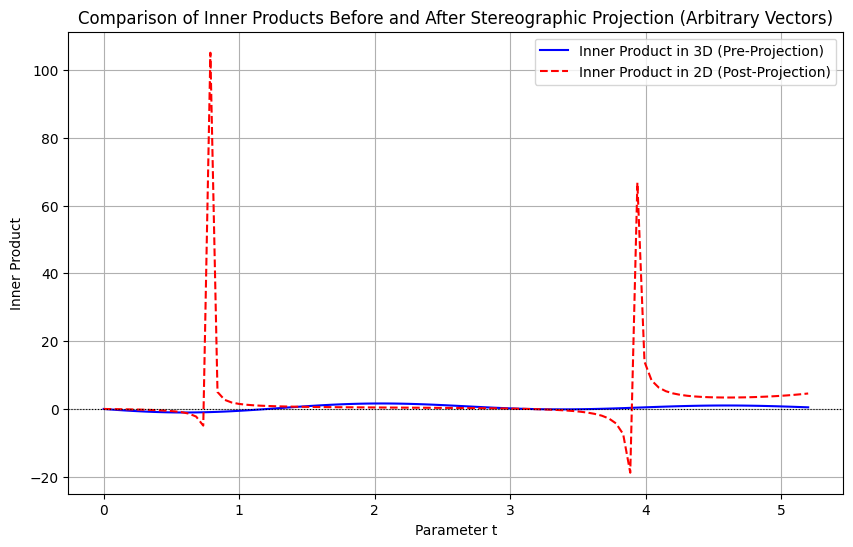

In [6]:
# Generate a simple curve on the sphere
t = np.linspace(0, 5.2, 100)
curve_x = np.sin(np.pi / 4) * np.cos(t)  # Curve at latitude θ = π/4
curve_y = np.sin(np.pi / 4) * np.sin(t)
curve_z = np.cos(np.pi / 4) * np.ones_like(t)

# Define two arbitrary vectors along the curve in 3D
vector1 = np.column_stack([-np.sin(t), np.sin(t), np.sin(t*2)])  # Arbitrary vector 1
vector2 = np.column_stack([np.cos(t), np.sin(t), -np.cos(t/2)])  # Arbitrary vector 2

# Compute inner product before projection
inner_product_3D = np.einsum('ij,ij->i', vector1, vector2)

# Apply stereographic projection to the vectors
vector1_proj_x, vector1_proj_y = stereographic_projection(vector1[:, 0], vector1[:, 1], vector1[:, 2])
vector2_proj_x, vector2_proj_y = stereographic_projection(vector2[:, 0], vector2[:, 1], vector2[:, 2])

# Stack the 2D projected vectors for inner product calculation
vector1_proj = np.column_stack([vector1_proj_x, vector1_proj_y])
vector2_proj = np.column_stack([vector2_proj_x, vector2_proj_y])

# Compute inner product after projection
inner_product_2D = np.einsum('ij,ij->i', vector1_proj, vector2_proj)

magnitude_vector1_proj = np.linalg.norm(vector1_proj, axis=1)
magnitude_vector2_proj = np.linalg.norm(vector2_proj, axis=1)
print("Projected Vector 1 Magnitudes:", magnitude_vector1_proj[:5])
print("Projected Vector 2 Magnitudes:", magnitude_vector2_proj[:5])

# Plot inner products for comparison
plt.figure(figsize=(10, 6))
plt.plot(t, inner_product_3D, label="Inner Product in 3D (Pre-Projection)", color='blue')
plt.plot(t, inner_product_2D, label="Inner Product in 2D (Post-Projection)", color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8, linestyle='dotted')
plt.title("Comparison of Inner Products Before and After Stereographic Projection (Arbitrary Vectors)")
plt.xlabel("Parameter t")
plt.ylabel("Inner Product")
plt.legend()
plt.grid(True)
plt.savefig('inner_product_comparison.png')
plt.show()

In general, the inner product is not conserved by the stereographic projection, a conformal transformation that preserves angles but not lengths. 

Part e)

The stereographic projection can't alter the holonomy of a parallel transport on the unit sphere because it preserves angles. A circle on the sphere (or rotation from 0 to 2pi) remains a circle when mapped by stereographic projection (as seen in  part b). 